In [1]:
import pandas as pd
import numpy as np
import re

data=pd.read_excel("resturant.xlsx")
data.drop(['url','phone','reviews_list','listed_in(city)','menu_item'],axis=1,inplace=True)


In [2]:
after_drop_duplicates=data.drop_duplicates()

def clean_restro_name(name):
    if isinstance(name,str):
        if(re.findall(r'[a-zA-Z0-9 ]',name)):
            list_name=re.findall(r'[a-zA-Z0-9 ]',name)
            str_name="".join(list_name)
            return str_name
    else:
        return name
            
        
after_drop_duplicates['name']=after_drop_duplicates['name'].apply(clean_restro_name)

def clean_rate(rates):
    if rates == "-" or rates == "NEW":
         return np.nan
    else:
         rates_converted = float(str(rates).split('/')[0])
            
    return rates_converted

after_drop_duplicates['rate']=after_drop_duplicates['rate'].apply(clean_rate)

after_drop_duplicates['location'].fillna("No_Info",inplace=True)

after_drop_duplicates['dish_liked'].fillna("No_Info",inplace=True)

after_drop_duplicates['rest_type'].fillna('No_info',inplace=True)

after_drop_duplicates['cuisines'].fillna('No_Info',inplace=True)

after_drop_duplicates['approx_cost(for two people)']=after_drop_duplicates['approx_cost(for two people)'].fillna(after_drop_duplicates.groupby('rest_type')['approx_cost(for two people)'].transform('mean'))

after_drop_duplicates['rate']=after_drop_duplicates['rate'].fillna(after_drop_duplicates.groupby('rest_type')['rate'].transform('mean'))

after_drop_duplicates['rate'].fillna(after_drop_duplicates['rate'].mean(),inplace=True)

after_drop_duplicates.info()


C:\Users\samid\AppData\Local\Temp\ipykernel_5340\1132407145.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_drop_duplicates['name']=after_drop_duplicates['name'].apply(clean_restro_name)
C:\Users\samid\AppData\Local\Temp\ipykernel_5340\1132407145.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_drop_duplicates['rate']=after_drop_duplicates['rate'].apply(clean_rate)
C:\Users\samid\AppData\Local\Temp\ipykernel_5340\1132407145.py:25: SettingWithCopyWarning: 
A value is trying to be set on 

<class 'pandas.core.frame.DataFrame'>
Index: 35151 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      35151 non-null  object 
 1   name                         35151 non-null  object 
 2   online_order                 35151 non-null  object 
 3   book_table                   35151 non-null  object 
 4   rate                         35151 non-null  float64
 5   votes                        35151 non-null  int64  
 6   location                     35151 non-null  object 
 7   rest_type                    35151 non-null  object 
 8   dish_liked                   35151 non-null  object 
 9   cuisines                     35151 non-null  object 
 10  approx_cost(for two people)  35151 non-null  float64
 11  listed_in(type)              35151 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


In [3]:
#1 Top 10 Restaurants with highest votes
Top10_votes=after_drop_duplicates.groupby('name').mean('votes').sort_values(by='votes',ascending=False).head(10)
Top10_votes

#2 Top 10 Restaurants with highest rates
rest_rate=after_drop_duplicates.groupby('name').mean('rate').sort_values(by='rate',ascending=False).head(10)
rest_rate

#3 Top 10 Low Cost restaurants
lowest_cost=after_drop_duplicates.groupby('name').min('approx_cost(for two people)').sort_values\
(by='approx_cost(for two people)',ascending=True).head(10)
lowest_cost

#4 Top 10 High Cost restaurants
highest_cost=after_drop_duplicates.groupby('name').max('approx_cost(for two people)').sort_values(by='approx_cost(for two people)',ascending=False).head(10)
highest_cost

#5 Top 10 Cafes with highest Rate
cafe=after_drop_duplicates[after_drop_duplicates['listed_in(type)']=='Cafes']
cafe=cafe.sort_values(by='rate',ascending=False).head(10)

#6 Top 10 Restaurant filter with Desserts with highest Rate
ice_cream_rate=after_drop_duplicates[after_drop_duplicates['listed_in(type)']=='Desserts']
ice_cream_rate=ice_cream_rate.groupby('name').mean('rate').sort_values(by='rate',ascending=False).head(10)

#-------------------------------------------------------------------------------------------------------------------------
#7 Top 10 Desserts Restaurant filter with Desserts with highest Votes
dessert_rate=after_drop_duplicates.groupby('location').mean('rate').sort_values(by='rate',ascending=False).head(10)
dessert_rate

#8 Top 10 locations with the highest-rated restaurants
after_drop_duplicates.groupby('location').mean('rate').sort_values(by='rate',ascending=False).head(10)

#9 Restaurant with Highest Voting that sells popular dish
dish=after_drop_duplicates[after_drop_duplicates['dish_liked']=='Biryani']
dish=dish.groupby('name').agg({'rate':'mean','votes':'mean','dish_liked':'max'}).sort_values(by='votes', ascending=False).head(10)

#10 Restaurants to Dine-out according to votes
Dine_out_vote=after_drop_duplicates[after_drop_duplicates['listed_in(type)']=='Dine-out'].groupby('name').\
mean('rate').sort_values(by='votes',ascending=False).head(10)
Dine_out_vote

#11 Restaurant with highest rating which gives Home Delivery
Home_Delivery=after_drop_duplicates[after_drop_duplicates['listed_in(type)']=='Delivery'].groupby('name')\
.agg({'rate':'mean','votes':'mean','listed_in(type)':'max'}).sort_values(by='rate',ascending=False).head(10)
Home_Delivery

#12 Restaurant with highes rating which gives Buffet
Buffet=after_drop_duplicates[after_drop_duplicates['listed_in(type)']=='Buffet'].groupby('name').mean('rate')\
.sort_values(by='rate',ascending=False).head(10)
Buffet

#13 Top 10 location of the restaurant according to highesh rating which gives Buffet
Buffet_loc=after_drop_duplicates[after_drop_duplicates['listed_in(type)']=='Buffet'].groupby('location')\
.agg({'rate':'mean','votes':'mean','listed_in(type)':'max'}).sort_values(by='rate',ascending=False).head(10)
Buffet_loc

#14 Top 10 Restaurants and its location with highest Votes that Delivers Popular dish
top_biryani_delivery = after_drop_duplicates[(after_drop_duplicates['dish_liked'] == 'Biryani') &\
                                             (after_drop_duplicates['listed_in(type)'] == 'Delivery')]
top_biryani_delivery_restaurants = top_biryani_delivery.groupby('name').agg({'votes': 'mean','rate':'mean',\
                                            'location':'max'}).sort_values(by='votes', ascending=False).head(10)
top_biryani_delivery_restaurants

#15 Top 10 Dessert Restaurants with popular/favorite dessert with highest rating and votes
fav_dessert = after_drop_duplicates[after_drop_duplicates['dish_liked'].str.contains('Chocolate Overload', case=False)]
fav_dessert = fav_dessert.groupby('name').agg({'rate':'mean','votes':'mean','dish_liked':'max'})\
.sort_values(by='votes',ascending=False)
fav_dessert

#16 Top 10 Restaurant with Popular dish/Fav dish Restaurant with highest vote that takes table booking
book=after_drop_duplicates[(after_drop_duplicates['dish_liked']=='Biryani') & \
(after_drop_duplicates['book_table']=='Yes')].groupby('name').agg({'rate':'mean','votes':'mean','book_table':'max'})\
.sort_values(by='votes',ascending=False)
book







,rate,votes,book_table
name,,,
Pallavi Restaurant,3.800000,490.000000,Yes
Havelli Chairmans Resort,3.500000,137.000000,Yes
eatfit,4.100000,103.000000,Yes
KKR FOODIES,3.175000,59.250000,Yes
Indian Durbar Conrad Bengaluru,3.766667,53.333333,Yes


In [4]:
#Level 1 Budget:40-300
Level1=after_drop_duplicates[after_drop_duplicates['approx_cost(for two people)'].between(40,300)]
Level1
#Level2 Budget:301-600
Level2=after_drop_duplicates[after_drop_duplicates['approx_cost(for two people)'].between(301,600)]
Level2
#Level3 Budget:601-900
Level3=after_drop_duplicates[after_drop_duplicates['approx_cost(for two people)'].between(601,900)]
Level3
#Level4 Budget:901-1500
Level4=after_drop_duplicates[after_drop_duplicates['approx_cost(for two people)'].between(901,1500)]
Level4
#Level5 Budget:1501-3000
Level5=after_drop_duplicates[after_drop_duplicates['approx_cost(for two people)'].between(1501,3000)]
Level5
#Level6 Budget:3001-6000
Level6=after_drop_duplicates[after_drop_duplicates['approx_cost(for two people)'].between(3001,6000)]
Level6

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
4996,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market The RitzCarlton,No,Yes,4.3,622,Residency Road,Fine Dining,"Pizza, Waffles, Pasta, Sushi, Roti, Salads, Fish","North Indian, European, Thai",3400.0,Buffet
6055,"Gateway Hotel, 66, Residency Road, Bangalore",Karavalli The Gateway Hotel,No,Yes,4.5,674,Residency Road,Fine Dining,"Appam, Fish, Sea Food, Cocktails, Prawn, Thali...","Mangalorean, Konkan, Seafood, Kerala",3500.0,Dine-out
6104,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",Alba JW Marriott Bengaluru,No,Yes,4.5,583,Lavelle Road,Fine Dining,"Pizza, Tiramisu, Pasta, Risotto, Lobster, Pann...",Italian,4000.0,Dine-out
6136,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market The RitzCarlton,No,Yes,4.3,612,Residency Road,Fine Dining,"Pizza, Waffles, Pasta, Sushi, Salads, Fish, Co...","North Indian, European, Thai",3400.0,Dine-out
6143,"ITC Gardenia, 1, Residency Road, Bangalore",Kebabs Kurries ITC Gardenia,No,Yes,4.3,355,Richmond Road,Fine Dining,"Dal Bukhara, Biryani, Fish, Gulab Jamun, Kulfi...","North Indian, Mughlai",3500.0,Dine-out
...,...,...,...,...,...,...,...,...,...,...,...,...
45619,"The Leela Palace, 23, Old Airport Road, Bangalore",Zen The Leela Palace,No,Yes,4.2,247,Old Airport Road,Fine Dining,"Wine, Dumplings, Set Menu, Chicken Dim Sum, To...","Thai, Japanese, Chinese",3500.0,Dine-out
48101,"Gateway Hotel, 66, Residency Road, Bangalore",Karavalli The Gateway Hotel,No,Yes,4.5,682,Residency Road,Fine Dining,"Appam, Fish, Sea Food, Cocktails, Prawn, Thali...","Mangalorean, Konkan, Seafood, Kerala",3500.0,Dine-out
48118,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Lantern Restaurant Bar The RitzCarlton,No,Yes,4.3,432,Residency Road,"Fine Dining, Bar","Dumplings, Momos, Chenin Blanc, Mapo Tofu, Coc...",Chinese,3500.0,Dine-out
48217,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",Alba JW Marriott Bengaluru,No,Yes,4.4,578,Lavelle Road,Fine Dining,"Pizza, Tiramisu, Pasta, Lobster, Risotto, Pann...",Italian,4000.0,Dine-out


In [5]:
after_drop_duplicates

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews Four Points by Sheraton Bengaluru,No,No,3.600000,27,Whitefield,Bar,No_Info,Continental,1500.0,Pubs and bars
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,3.792191,0,Whitefield,Bar,No_Info,Finger Food,600.0,Pubs and bars
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.792191,0,Whitefield,Bar,No_Info,Finger Food,2000.0,Pubs and bars
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


**Airport Data Analysis**

In [6]:
location_Airport=after_drop_duplicates[after_drop_duplicates['address'].str.contains('Airport',case=False)]
location_Airport

location_Airport_bestrest=location_Airport.groupby('name').agg({'rate':'mean','votes':'max','dish_liked':'max','address':'max','location':'max'}).sort_values(by='votes',ascending=False)
location_Airport_bestrest.head(10)


location_Airport_bestrest_bestdish=location_Airport_bestrest[location_Airport_bestrest['dish_liked'].str.contains('Biryani',case=False)]
location_Airport_bestrest_bestdish


location_Airport_bestrest_bestdish=location_Airport_bestrest[location_Airport_bestrest['dish_liked'].str.contains('Pizza',case=False)]
location_Airport_bestrest_bestdish.count()

rate          14
votes         14
dish_liked    14
address       14
location      14
dtype: int64

In [7]:
df_A=pd.DataFrame(location_Airport)
dish_liked_columns=df_A['dish_liked']
element_counts={}

for item in dish_liked_columns:
    if pd.notna(item):
        for i in item.split(','):
            element_counts[i]=element_counts.get(i,0)+1

counts_df_Airport=pd.DataFrame(list(element_counts.items()), columns=['Element','Count'])

print(counts_df_Airport.sort_values(by='Count',ascending=True))
# print("*************************************")
# print()

# # Assuming counts_df is your DataFrame
# for index, row in counts_df_Airport.sort_values(by='Count',ascending=True).iterrows():
#     element = row['Element']
#     count = row['Count']
#     print(element,":",count)

# print("************************************************************")
# for index, row in counts_df_Airport.sort_values(by='Element',ascending=True).iterrows():
#     element = row['Element']
#     count = row['Count']
#     print(element,":",count)


                Element  Count
223   Chicken Meatballs      1
181       Potato Wedges      1
191           Chocolava      1
192               Halwa      1
194      Chocolava Cake      1
..                  ...    ...
19                 Fish     20
32            Cocktails     21
40               Salads     21
30                Pizza     26
10              No_Info    220

[224 rows x 2 columns]


**College Data Analysis**


In [8]:
location_College=after_drop_duplicates[after_drop_duplicates['address'].str.contains('College',case=False)]
location_College

location_College_bestrest=location_College.groupby('name').agg({'rate':'mean','votes':'max','dish_liked':'max','address':'max','location':'max'}).sort_values(by='votes',ascending=False)
location_College_bestrest.head(10)


location_College_bestrest_bestdish=location_College_bestrest[location_College_bestrest['dish_liked'].str.contains('Biryani',case=False)]
location_Airport_bestrest_bestdish


location_College_bestrest_bestdish=location_College_bestrest[location_College_bestrest['dish_liked'].str.contains('Pizza',case=False)]
location_College_bestrest_bestdish.count()

rate          17
votes         17
dish_liked    17
address       17
location      17
dtype: int64

In [9]:
df_C=pd.DataFrame(location_College)
dish_liked_columns_college=df_C['dish_liked']
element_counts={}

for item in dish_liked_columns_college:
    if pd.notna(item):
        for i in item.split(','):
            element_counts[i]=element_counts.get(i,0)+1

counts_df_College=pd.DataFrame(list(element_counts.items()), columns=['Element','Count'])

print(counts_df_College.sort_values(by='Count',ascending=True))
# print("*************************************")
# print()

# # Assuming counts_df is your DataFrame
# for index, row in counts_df_College.sort_values(by='Count',ascending=True).iterrows():
#     element = row['Element']
#     count = row['Count']
#     print(element,":",count)

# print("************************************************************")
# for index, row in counts_df_College.sort_values(by='Element',ascending=True).iterrows():
#     element = row['Element']
#     count = row['Count']
#     print(element,":",count)


            Element  Count
182        Sandwich      1
100           Bonda      1
442      Fish Tikka      1
99      Vada Sambar      1
436   Sattu Paratha      1
..              ...    ...
73           Nachos     52
23            Pasta     77
207       Cocktails     88
78        Mocktails     88
7           No_Info    423

[480 rows x 2 columns]


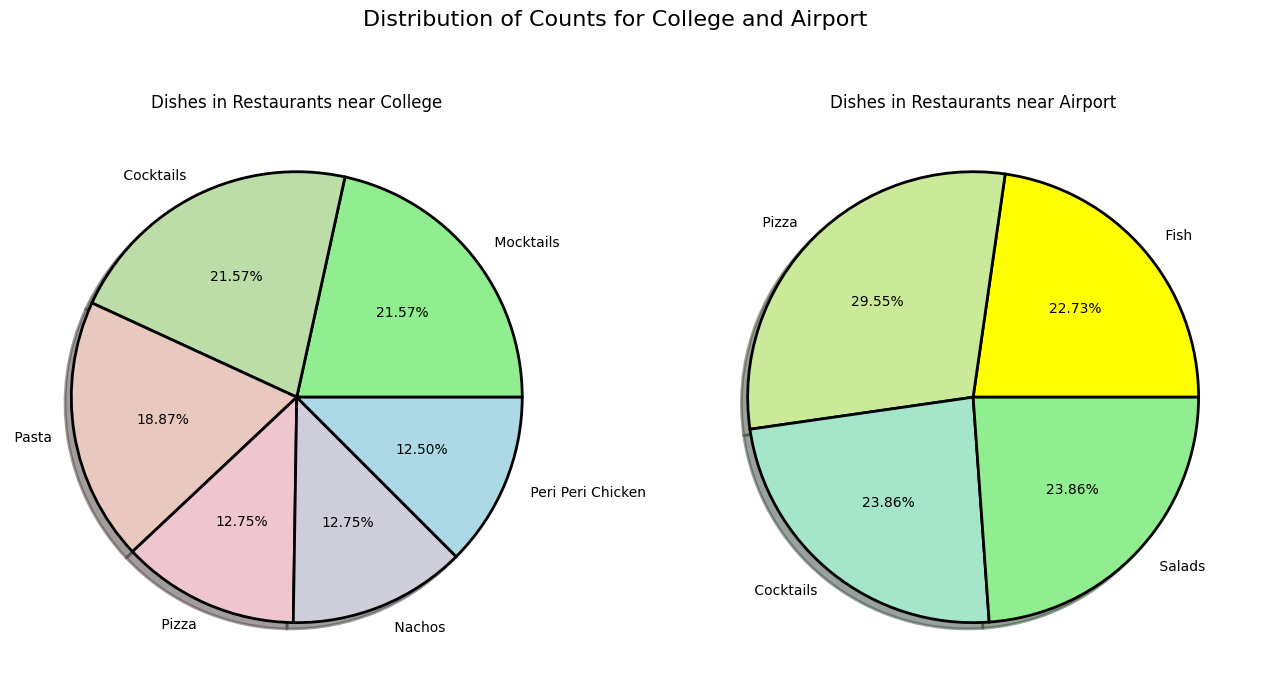

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import pandas as pd

# Function to create a pie chart
def pie_chart(ax, sizes, labels, cmap, title):
    edge_properties = dict(linewidth=2, edgecolor='black')
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors=cmap(np.arange(len(sizes))), wedgeprops=edge_properties)
    ax.set_title(title)

plt.figure(figsize=(16, 8))
plt.suptitle('Distribution of Counts for College and Airport', fontsize=16)

# College subplot
ax1 = plt.subplot(1, 2, 1)
df=counts_df_College[counts_df_College['Count'].between(50,100)].sort_values(by='Count',ascending=False)
sizes_college=df['Count']
labels_college=df['Element']
cmap_college = LinearSegmentedColormap.from_list('BlueToBlack', ['lightgreen', 'pink', 'lightblue'], N=len(sizes_college))
pie_chart(ax1, sizes_college, labels_college, cmap_college, 'Dishes in Restaurants near College')

# Airport subplot
ax2 = plt.subplot(1, 2, 2)
sizes_airport = counts_df_Airport[counts_df_Airport['Count'].between(20, 100)]['Count']
labels_airport = counts_df_Airport[counts_df_Airport['Count'].between(20, 100)]['Element']
cmap_airport = LinearSegmentedColormap.from_list('BlueToBlack', ['yellow','powderblue' ,'lightgreen'], N=len(sizes_airport))
pie_chart(ax2, sizes_airport, labels_airport, cmap_airport, 'Dishes in Restaurants near Airport')


plt.show()


In [11]:
# Assuming 'location_Airport' is your DataFrame
df_c_p = pd.DataFrame(location_College)

# Extract the 'approx_cost(for two people)' column
price_column_College = df_c_p['approx_cost(for two people)']

# Initialize an empty dictionary to store counts
element_counts = {}

# Iterate over each element in the 'approx_cost(for two people)' column
for element_list in price_column_College:
    if pd.notna(element_list):  # Skip NaN values if any
        # Check if the element is a list or a float
        if isinstance(element_list, list):
            # Flatten the list and iterate over each element
            for element in element_list:
                # Count the occurrences of each element in the dictionary
                element_counts[element] = element_counts.get(element, 0) + 1
        elif isinstance(element_list, (int, float)):
            # Convert float to string and count the occurrences
            element_counts[str(element_list)] = element_counts.get(str(element_list), 0) + 1

# Convert the dictionary to a DataFrame
counts_df_college_price = pd.DataFrame(list(element_counts.items()), columns=['Element', 'Count'])

# Display the counts
print(counts_df_college_price.sort_values(by='Count', ascending=True))

   Element  Count
13    80.0      1
12   199.0      2
16   950.0      6
24  1800.0     13
20   550.0     16
17   700.0     16
8    100.0     19
21   900.0     20
18  1000.0     25
14   450.0     29
10   350.0     29
22  1400.0     31
23  1300.0     32
9    650.0     33
15  1200.0     33
3    750.0     41
6    150.0     42
19  1500.0     53
5    250.0     64
2    600.0     81
0    800.0     86
7    200.0    103
1    400.0    123
11   500.0    124
4    300.0    152


In [12]:
# Assuming 'location_Airport' is your DataFrame
df_a_p = pd.DataFrame(location_Airport)

# Extract the 'approx_cost(for two people)' column
price_column_Airport = df_a_p['approx_cost(for two people)']

# Initialize an empty dictionary to store counts
element_counts = {}

# Iterate over each element in the 'approx_cost(for two people)' column
for element_list in price_column_Airport:
    if pd.notna(element_list):  # Skip NaN values if any
        # Check if the element is a list or a float
        if isinstance(element_list, list):
            # Flatten the list and iterate over each element
            for element in element_list:
                # Count the occurrences of each element in the dictionary
                element_counts[element] = element_counts.get(element, 0) + 1
        elif isinstance(element_list, (int, float)):
            # Convert float to string and count the occurrences
            element_counts[str(element_list)] = element_counts.get(str(element_list), 0) + 1

# Convert the dictionary to a DataFrame
counts_df_Airport_price = pd.DataFrame(list(element_counts.items()), columns=['Element', 'Count'])

# Display the counts
print(counts_df_Airport_price.sort_values(by='Count', ascending=True))

               Element  Count
31  322.41713956739864      2
24              1200.0      2
22               120.0      2
18               750.0      2
17                40.0      2
25              4000.0      2
28              6000.0      2
26              2000.0      2
10              2200.0      4
23               100.0      4
21              1900.0      4
29              3000.0      4
27              2400.0      4
9               3500.0      6
6                650.0      6
11              1400.0      8
4               1500.0     10
14               550.0     10
30               900.0     10
13               450.0     11
3                800.0     11
16               350.0     11
5               1000.0     16
8               1800.0     16
1                600.0     17
2                250.0     18
19               150.0     23
15               200.0     26
20               500.0     32
12               700.0     33
0                300.0     62
7                400.0     67


**If i want to add prices in my menu card how can i decide?**

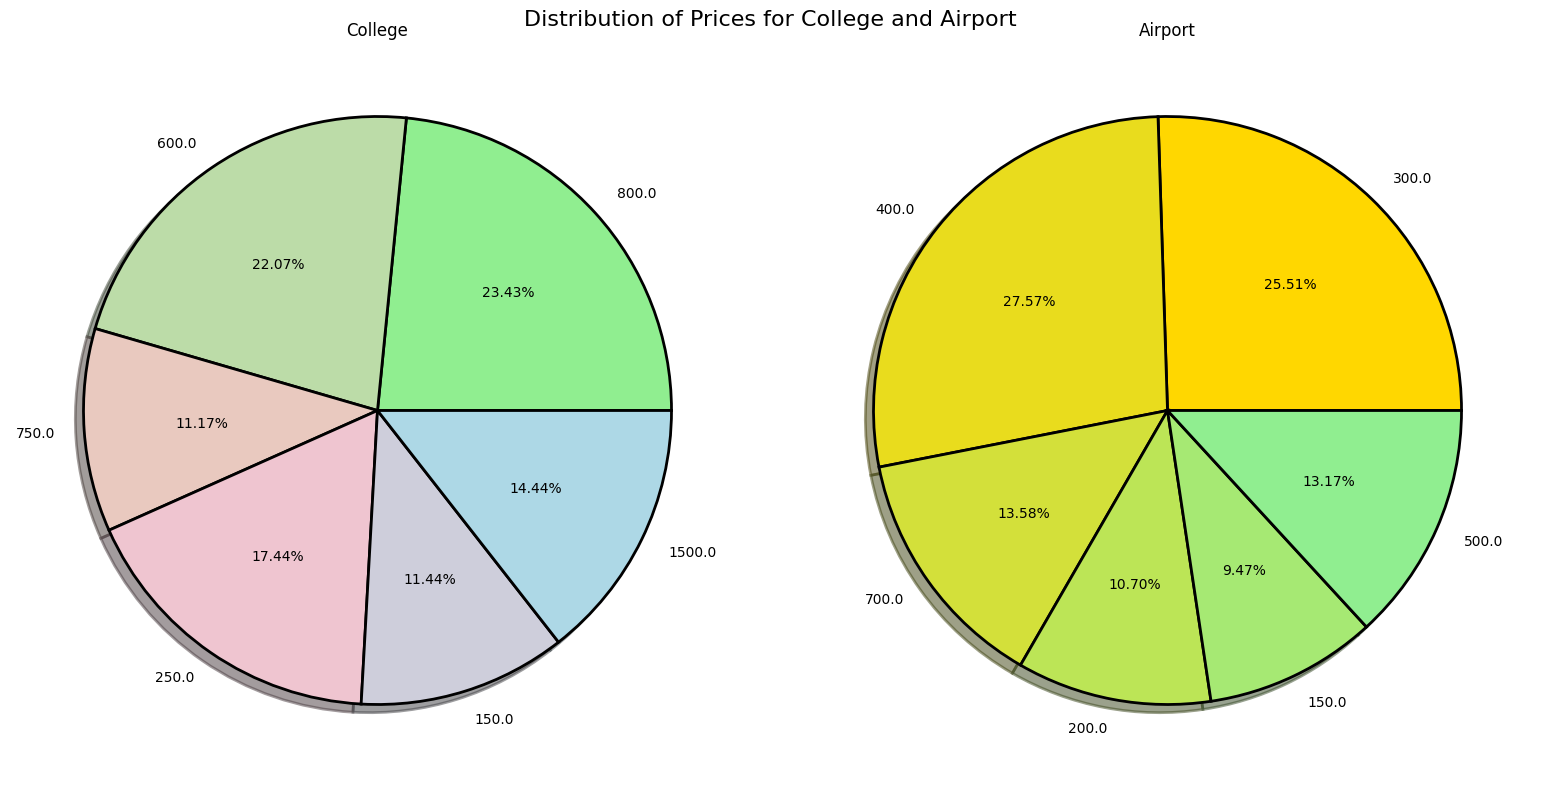

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import pandas as pd

# Function to create a pie chart
def create_pie_chart(ax, sizes, labels, cmap, title):
    edge_properties = dict(linewidth=2, edgecolor='black')
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors=cmap(np.arange(len(sizes))), wedgeprops=edge_properties)
    ax.set_title(title)

# Assuming counts_df_college and counts_df_Airport are your DataFrames

# College dataset
plt.figure(figsize=(16, 8))
plt.suptitle('Distribution of Prices for College and Airport', fontsize=16)

# College subplot
ax1 = plt.subplot(1, 2, 1)
sizes_college = counts_df_college_price[counts_df_college_price['Count'].between(40, 100)]['Count']
labels_college = counts_df_college_price[counts_df_college_price['Count'].between(40, 100)]['Element']
cmap_college = LinearSegmentedColormap.from_list('BlueToBlack', ['lightgreen', 'pink', 'lightblue'], N=len(sizes_college))
create_pie_chart(ax1, sizes_college, labels_college, cmap_college, 'College')

# Airport subplot
ax2 = plt.subplot(1, 2, 2)
sizes_airport = counts_df_Airport_price[counts_df_Airport_price['Count'].between(20, 100)]['Count']
labels_airport = counts_df_Airport_price[counts_df_Airport_price['Count'].between(20, 100)]['Element']
cmap_airport = LinearSegmentedColormap.from_list('BlueToBlack', ['gold', 'lightgreen'], N=len(sizes_airport))
create_pie_chart(ax2, sizes_airport, labels_airport, cmap_airport, 'Airport')

plt.tight_layout()
plt.show()


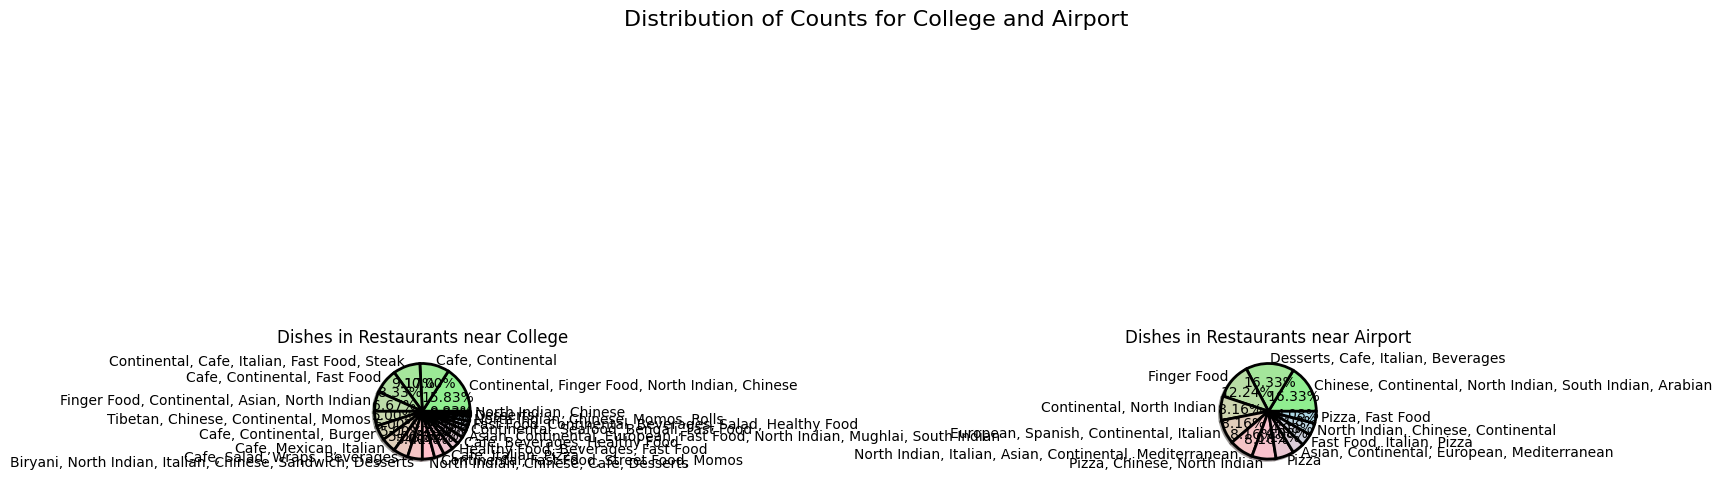

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import pandas as pd

# Function to create a pie chart
def pie_chart(ax, sizes, labels, cmap, title):
    edge_properties = dict(linewidth=2, edgecolor='black')
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors=cmap(np.arange(len(sizes))), wedgeprops=edge_properties)
    ax.set_title(title)

plt.figure(figsize=(16, 8))
plt.suptitle('Distribution of Counts for College and Airport', fontsize=16)


# College subplot
ax1 = plt.subplot(1, 2, 1)
location_College_Cuisines_dish=location_College[location_College['dish_liked'].str.contains('pasta',case=False)].groupby('cuisines').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_college=location_College_Cuisines_dish['name']
labels_c_cuisine=location_College_Cuisines_dish.index
cmap_college = LinearSegmentedColormap.from_list('BlueToBlack', ['lightgreen', 'pink', 'lightblue'], N=len(sizes_college))
pie_chart(ax1, sizes_college, labels_c_cuisine, cmap_college, 'Dishes in Restaurants near College')


# Airport subplot
ax2 = plt.subplot(1, 2, 2)
location_Airport_Cuisines_dish=location_Airport[location_Airport['dish_liked'].str.contains('pizza',case=False)].groupby('cuisines').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_Airport=location_Airport_Cuisines_dish['name']
labels_a_cuisine=location_Airport_Cuisines_dish.index
cmap_Airport= LinearSegmentedColormap.from_list('BlueToBlack', ['lightgreen', 'pink', 'lightblue'], N=len(sizes_Airport))
pie_chart(ax2, sizes_Airport, labels_a_cuisine, cmap_Airport, 'Dishes in Restaurants near Airport')

plt.tight_layout()
plt.show()


**Restaurant near College with popular dish 'Pasta' with highest % Cuisines**

**To find out which types of cuisines include pasta in their menus in restaurants near College**

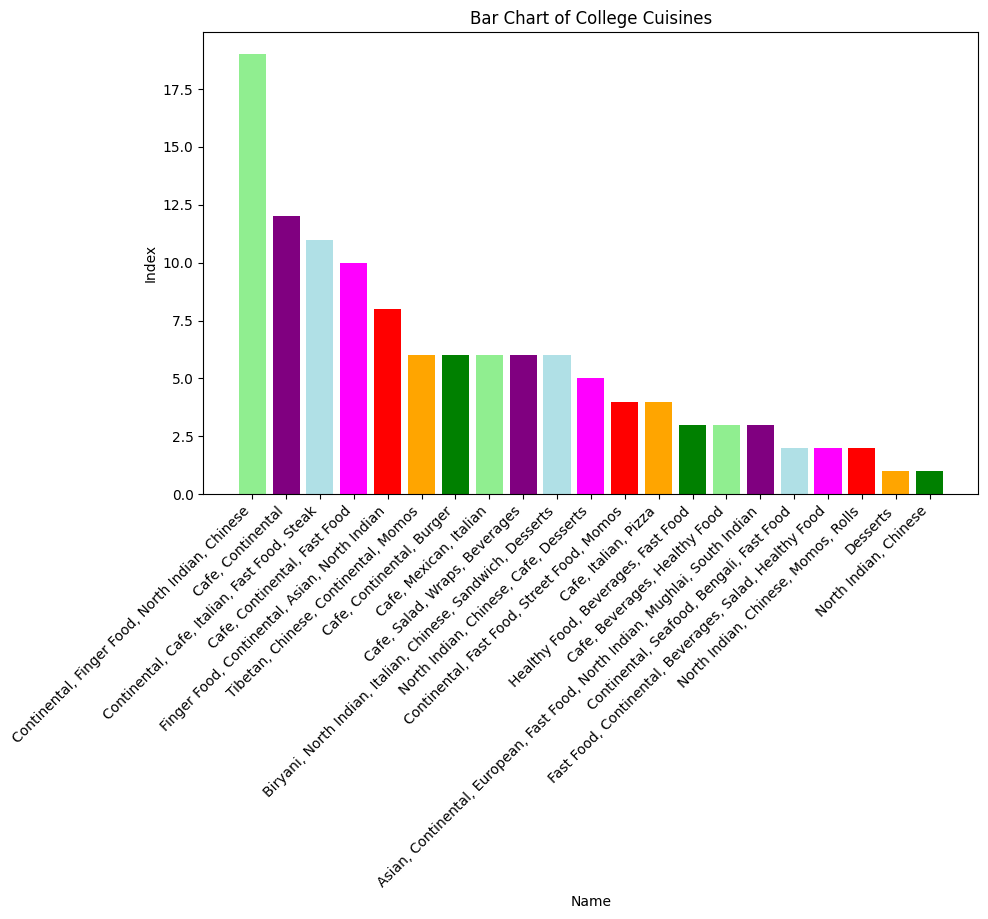

In [54]:
location_College_Cuisines_dish=location_College[location_College['dish_liked'].str.contains('pasta',case=False)].groupby('cuisines').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
location_College_Cuisines_dish
# plt.figure(figsize=(10,9))
# plt.pie(location_College_Cuisines_dish['name'],labels=location_College_Cuisines_dish.index,autopct='%1.2f%%',shadow=True,colors=['lavender','yellow','pink','lightgreen','violet','teal','powderblue'])
# plt.title('Restaurant near College with highest of 15.83% of restaurants includes Cuisines "Northidian, chinese,Finger Food,Continental" ')
# # plt.legend()
# plt.show()


plt.figure(figsize=(10, 6))
plt.bar( location_College_Cuisines_dish.index,location_College_Cuisines_dish['name'],color=['lightgreen','purple','powderblue','magenta','red','orange','green'])
plt.xlabel('Name')
plt.ylabel('Index')
plt.title('Bar Chart of College Cuisines')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

plt.show()

**To find out which types of cuisines include an approximate cost of 800 for two people in their menus in Restaurants near College**

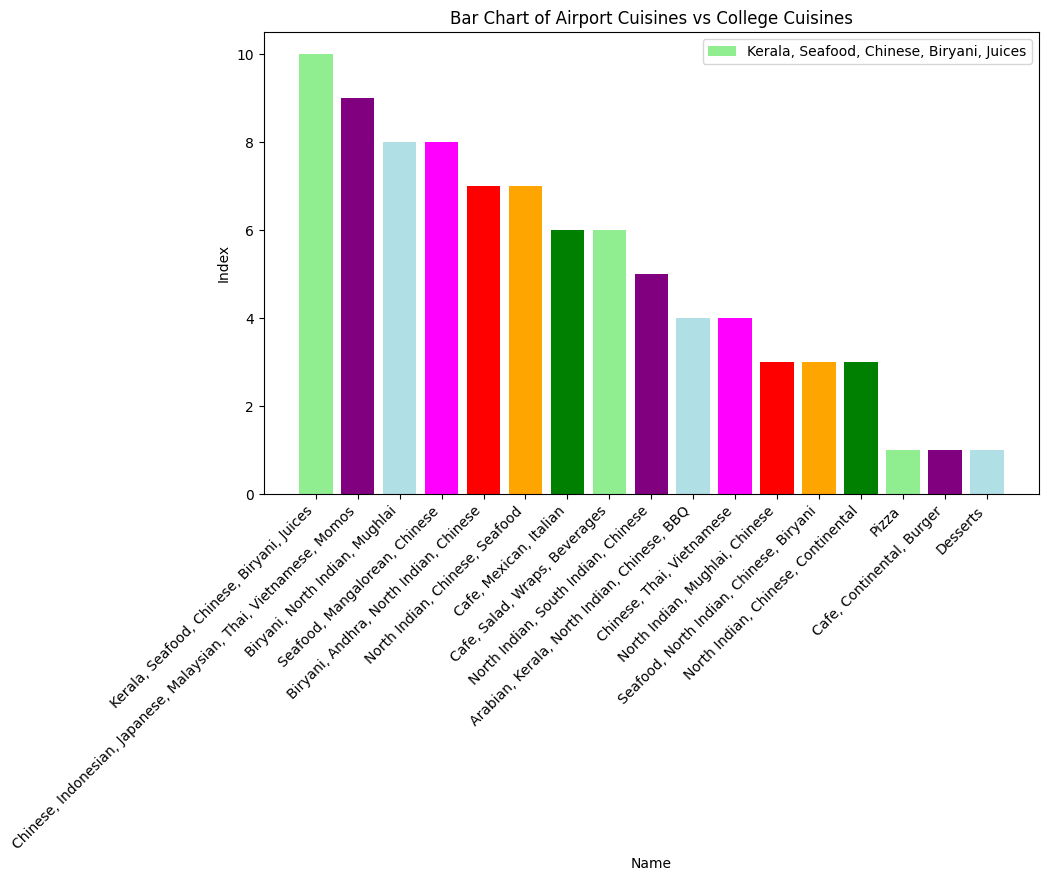

In [51]:
location_College_Cuisines_dish_price=location_College[location_College['approx_cost(for two people)']==800].groupby('cuisines').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
location_College_Cuisines_dish_price
# plt.figure(figsize=(10,9))
# plt.pie(location_College_Cuisines_dish_price['name'],labels=location_College_Cuisines_dish_price.index,autopct='%1.2f%%',shadow=True,colors=['lavender','yellow','pink','lightgreen','violet','teal','powderblue'])
# plt.title('Restaurant near College with highest of 15.38% of restaurants includes Cuisines "Northidian, chinese,Finger Food,Continental" ')
# # plt.legend()
# plt.show()


plt.figure(figsize=(10, 6))
plt.bar( location_College_Cuisines_dish_price.index,location_College_Cuisines_dish_price['name'],color=['lightgreen','purple','powderblue','magenta','red','orange','green'])
plt.xlabel('Name')
plt.ylabel('Index')
plt.title('Bar Chart of Airport Cuisines vs College Cuisines')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed
plt.legend(location_College_Cuisines_dish_price.index)

plt.show()

**To find out which types of cuisines include an approximate cost of 400 for two people in their menus in Restaurants near Airport**

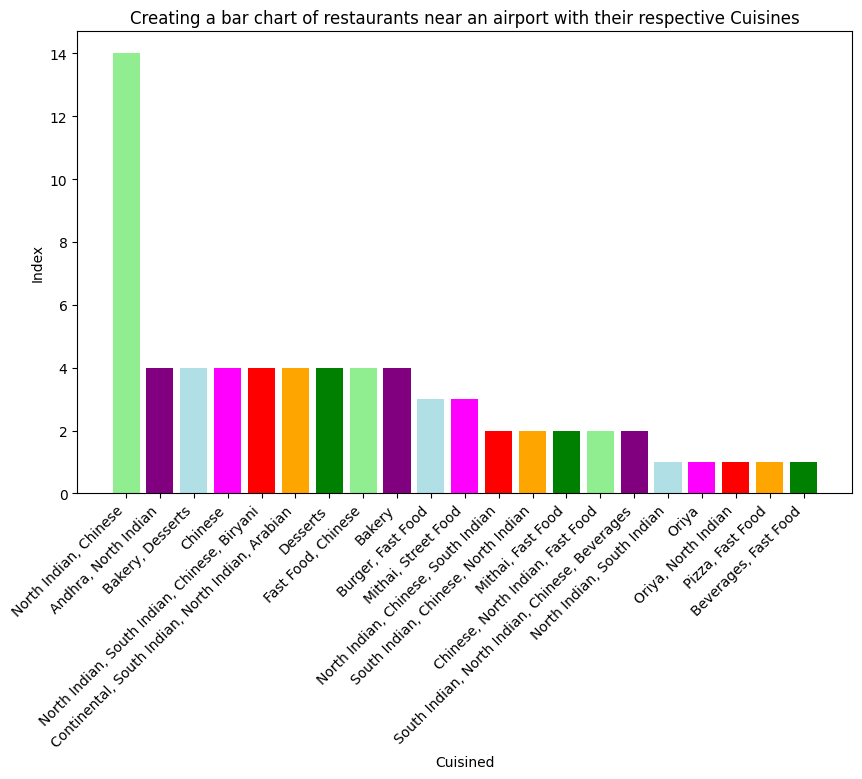

In [52]:
location_Airport_Cuisines=location_Airport[location_Airport['approx_cost(for two people)']==400].groupby('cuisines').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
location_Airport_Cuisines
# plt.figure(figsize=(10,9))
# plt.pie(location_Airport_Cuisines['name'],labels=location_Airport_Cuisines.index,autopct='%1.2f%%',shadow=True,colors=['lavender','yellow','pink','lightgreen','violet','teal','powderblue'])
# plt.title('Restaurant near Airport with highest of 20.90% of restaurants includes Cuisines from "Northidian, chinese" with budget of Rs 400')
# plt.show()

plt.figure(figsize=(10, 6))
plt.bar(location_Airport_Cuisines.index,location_Airport_Cuisines['name'],color=['lightgreen','purple','powderblue','magenta','red','orange','green'])
plt.xlabel('Cuisined')
plt.ylabel('Index')
plt.title('Creating a bar chart of restaurants near an airport with their respective Cuisines')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

plt.show()

**Online Order**

**To find out whether online orders are available for restaurants near college and airport that include pasta and pizza in their menus**

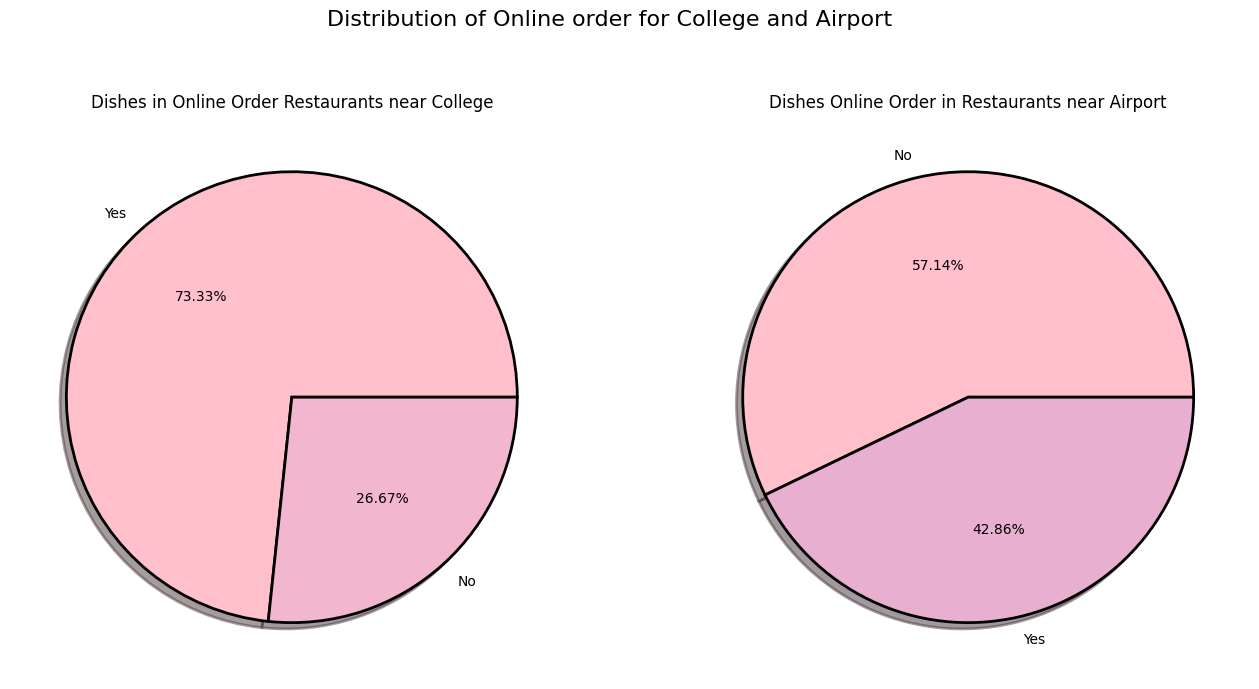

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import pandas as pd

# Function to create a pie chart
def pie_chart(ax, sizes, labels, cmap, title):
    edge_properties = dict(linewidth=2, edgecolor='black')
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors=cmap(np.arange(len(sizes))), wedgeprops=edge_properties)
    ax.set_title(title)

plt.figure(figsize=(16, 8))
plt.suptitle('Distribution of Online order for College and Airport', fontsize=16)


# College subplot
ax1 = plt.subplot(1, 2, 1)
location_College_Cuisines_dish_onlineorder=location_College[location_College['dish_liked'].str.contains('pasta',case=False)].groupby('online_order').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_college_o=location_College_Cuisines_dish_onlineorder['name']
labels_c_cuisine_o=location_College_Cuisines_dish_onlineorder.index
cmap_college_o = LinearSegmentedColormap.from_list('BlueToBlack', ['pink', 'blue'], N=len(sizes_college))
pie_chart(ax1, sizes_college_o, labels_c_cuisine_o, cmap_college_o, 'Dishes in Online Order Restaurants near College')


# Airport subplot
ax2 = plt.subplot(1, 2, 2)
location_Airport_Cuisines_dish_onlineorder=location_Airport[location_Airport['dish_liked'].str.contains('pizza',case=False)].groupby('online_order').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_Airport_o=location_Airport_Cuisines_dish_onlineorder['name']
labels_a_cuisine_o=location_Airport_Cuisines_dish_onlineorder.index
cmap_Airport_o= LinearSegmentedColormap.from_list('BlueToBlack', ['pink','blue'], N=len(sizes_Airport))
pie_chart(ax2, sizes_Airport_o, labels_a_cuisine_o, cmap_Airport_o, 'Dishes Online Order in Restaurants near Airport')


plt.show()


**Book Table**

**To find out whether table booking are available for restaurants that include pasta and pizza in their menus**

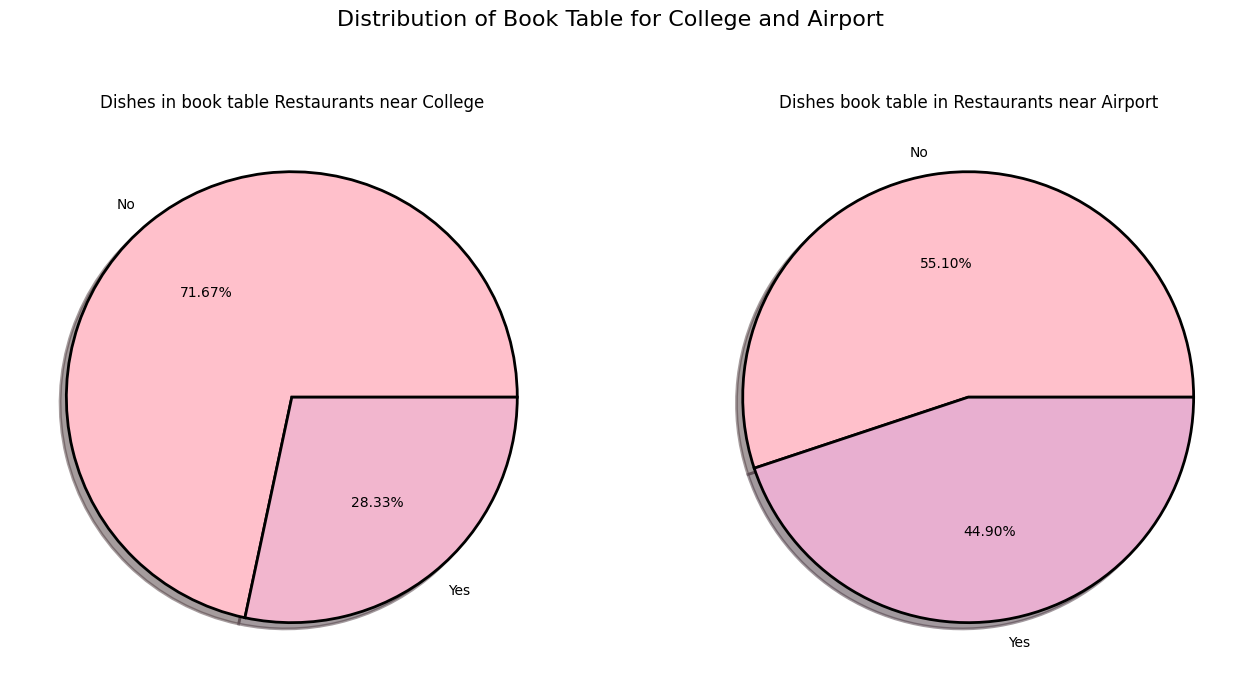

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import pandas as pd

# Function to create a pie chart
def pie_chart(ax, sizes, labels, cmap, title):
    edge_properties = dict(linewidth=2, edgecolor='black')
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors=cmap(np.arange(len(sizes))), wedgeprops=edge_properties)
    ax.set_title(title)

plt.figure(figsize=(16, 8))
plt.suptitle('Distribution of Book Table for College and Airport', fontsize=16)


# College subplot
ax1 = plt.subplot(1, 2, 1)
location_College_Cuisines_dish_book_table=location_College[location_College['dish_liked'].str.contains('pasta',case=False)].groupby('book_table').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_college_book_table=location_College_Cuisines_dish_book_table['name']
labels_c_cuisine_book_table=location_College_Cuisines_dish_book_table.index
cmap_college_book_table = LinearSegmentedColormap.from_list('BlueToBlack', ['pink', 'blue'], N=len(sizes_college))
pie_chart(ax1, sizes_college_book_table, labels_c_cuisine_book_table, cmap_college_book_table, 'Dishes in book table Restaurants near College')


# Airport subplot
ax2 = plt.subplot(1, 2, 2)
location_Airport_Cuisines_dish_book_table=location_Airport[location_Airport['dish_liked'].str.contains('pizza',case=False)].groupby('book_table').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_Airport_book_table=location_Airport_Cuisines_dish_book_table['name']
labels_a_cuisine_book_table=location_Airport_Cuisines_dish_book_table.index
cmap_Airport_book_table= LinearSegmentedColormap.from_list('BlueToBlack', ['pink','blue'], N=len(sizes_Airport))
pie_chart(ax2, sizes_Airport_book_table, labels_a_cuisine_book_table, cmap_Airport_book_table, 'Dishes book table in Restaurants near Airport')


plt.show()


**To find out whether restaurants that include pasta and pizza in their menus offer services like "dine-out," "desserts," "cafe," etc.**

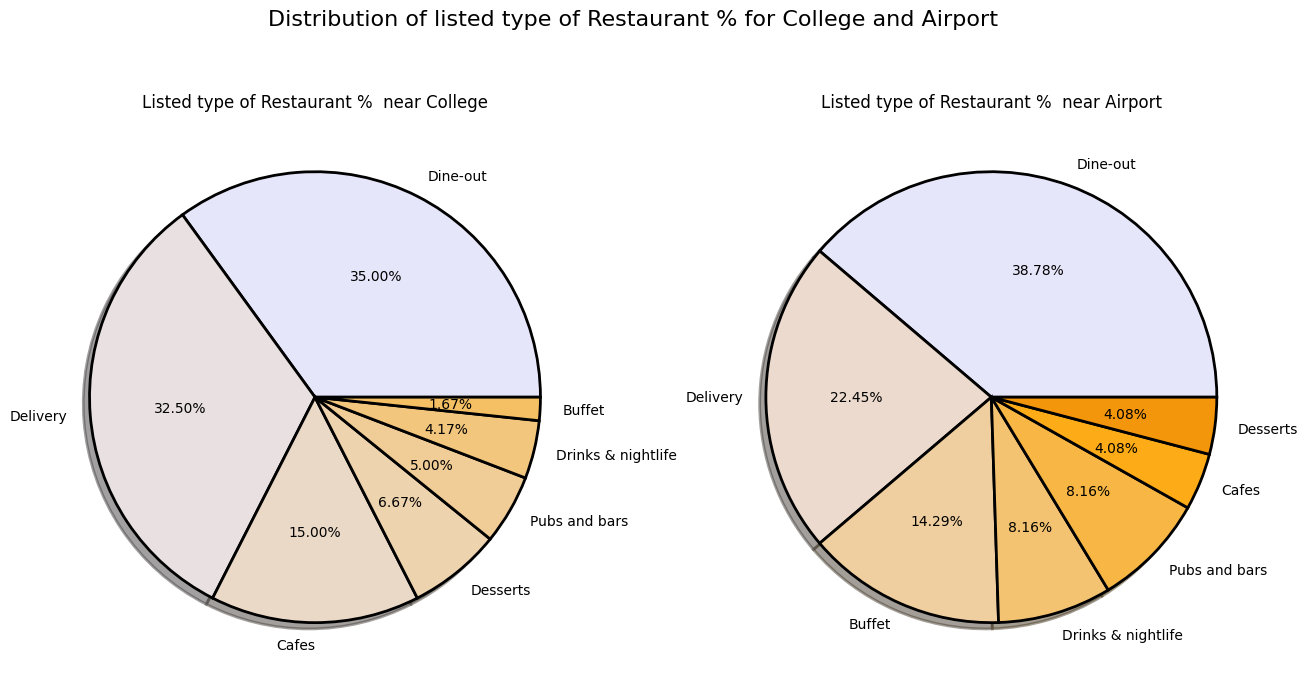

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import pandas as pd

# Function to create a pie chart
def pie_chart(ax, sizes, labels, cmap, title):
    edge_properties = dict(linewidth=2, edgecolor='black')
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors=cmap(np.arange(len(sizes))), wedgeprops=edge_properties)
    ax.set_title(title)

plt.figure(figsize=(16, 8))
plt.suptitle('Distribution of listed type of Restaurant % for College and Airport', fontsize=16)


# College subplot
ax1 = plt.subplot(1, 2, 1)
location_College_Cuisines_dish_book_table=location_College[location_College['dish_liked'].str.contains('pasta',case=False)].groupby('listed_in(type)').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_college_book_table=location_College_Cuisines_dish_book_table['name']
labels_c_cuisine_book_table=location_College_Cuisines_dish_book_table.index
cmap_college_book_table = LinearSegmentedColormap.from_list('BlueToBlack', ['lavender','orange', 'purple'], N=len(sizes_college))
pie_chart(ax1, sizes_college_book_table, labels_c_cuisine_book_table, cmap_college_book_table, 'Listed type of Restaurant %  near College')


# Airport subplot
ax2 = plt.subplot(1, 2, 2)
location_Airport_Cuisines_dish_listedtype=location_Airport[location_Airport['dish_liked'].str.contains('pizza',case=False)].groupby('listed_in(type)').agg({'name':'count','rate':'mean','location':'max'}).sort_values(by='name',ascending=False)
sizes_Airport_listedtype=location_Airport_Cuisines_dish_listedtype['name']
labels_a_cuisine_listedtype=location_Airport_Cuisines_dish_listedtype.index
cmap_Airport_listedtype= LinearSegmentedColormap.from_list('BlueToBlack', ['lavender','orange', 'purple'], N=len(sizes_Airport))
pie_chart(ax2, sizes_Airport_listedtype, labels_a_cuisine_listedtype, cmap_Airport_listedtype, 'Listed type of Restaurant %  near Airport')


plt.show()
